## Ананьев Роман

# Лабораторная работа №5
### Интервальное оценивание параметров рапределения по выборке

In [64]:

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.special as sc
import statsmodels.api as sm
import statsmodels.stats.weightstats
import statsmodels.stats.proportion

# Пример 1

In [65]:
s = ('4.740, 4.747, 4.749, 4.758, 4.761, 4.764, 4.764, 4.764, 4.765, 4.767, 4.768, '
'4.769, 4.769, 4.771, 4.771, 4.772, 4.772, 4.772, 4.774, 4.775, 4.775, 4.776, '
'4.777, 4.777, 4.778, 4.779, 4.779, 4.779, 4.781, 4.781, 4.782, 4.783, 4.783, '
'4.785, 4.785, 4.785, 4.788, 4.788, 4.789, 4.789, 4.790, 4.790, 4.790, 4.791, '
'4.791, 4.791, 4.792, 4.792, 4.795, 4.797, 4.799, 4.799, 4.801, 4.805, 4.806, '
'4.808, 4.809, 4.81'
).split(", ")


samp = list(map(float, s))

n = len(samp)

#построим доверительные интервалы для матожидания и дисп для B = 0.9 по формулам 2, 4
mu = np.mean(samp) # выборочно ематожидание
S = np.std(samp, ddof = 1) # испр выборочная дисперсия

B = 0.9 #доверительная вероятность 
a = 1 - B
from scipy.stats import t
t_n = t.ppf((1+B)/2, df = n)   # df - степени свободы

#тогда интервал для матожидания будет:
print(f'{mu - t_n*S/np.sqrt(n)} < m < {mu + t_n*S/np.sqrt(n)}')


# t_correct = t.ppf(1 - a/2, df=n-1)  # Правильные степени свободы и квантиль
# margin = t_correct * S / np.sqrt(n)  # Без (n-1)!
# print(f"{mu - margin:.4f} < m < {mu + margin:.4f}")

4.777454004087362 < m < 4.784166685567811


In [66]:
#использование встроенных доверительных интервалов
from statsmodels.stats.weightstats import DescrStatsW as ds
desc = ds(samp)

x1, x2 = desc.tconfint_mean(alpha = a)
print(f'{x1:.4f} < m <  {x2:.4f}')



#другой способ
ci = sts.t.interval(confidence=B, df = n-1, loc = mu, scale = S/np.sqrt(n))
print(f'{ci[0]:.4f} < m <  {ci[1]:.4f}')

4.7775 < m <  4.7842
4.7775 < m <  4.7842


In [67]:
#теперь для дисперсии
#ищем квантили хи-квадрат
from scipy.stats import chi2
chi2_low = chi2.ppf((1+B)/2, df=n-1)   
chi2_upp = chi2.ppf((1-B)/2, df=n-1)

x1 = (n-1)*S**2 / chi2_upp
x2 = (n-1)*S**2 / chi2_low

print(f'{x1:.4f} < D < {x2:.4f}')

0.0003 < D < 0.0002


In [68]:
from scipy.stats import t
eps = 0.005
A = eps*np.sqrt(n)/S

print(t.cdf(A, n-1) - t.cdf(-A, n-1) )


0.9842912775152693


In [69]:
delta = 0.005
std_v = np.std(samp, ddof=1)
Z = delta * np.sqrt(n)/S
p = sts.t(n-1).cdf(Z) - sts.t(n-1).cdf(-Z)
print(p)



0.9842912775152693


# Пример 2

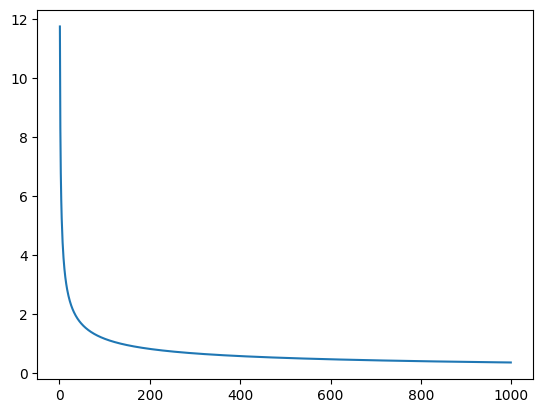

In [70]:
#1)
from scipy.stats import norm
sigm = 3
B = 0.95
u = sts.norm.ppf((1+B)/2)
n = np.arange(1, 1000)
len_int = 2 * u * sigm / np.sqrt(n)
plt.plot(n, len_int)

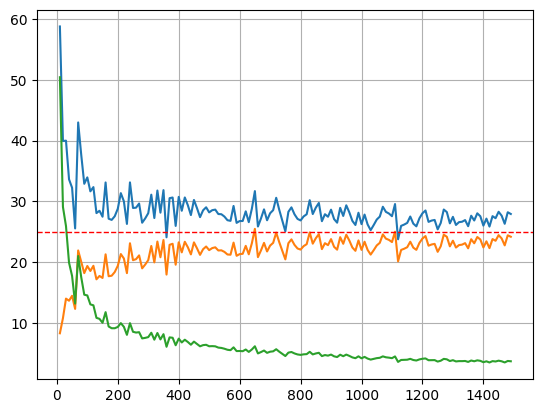

In [71]:
#2)
from scipy.stats import chi2
mu = 4
sigm = 5
B = 0.95
lbound_vals = []
rbound_vals = []
n_val = np.arange(10, 1500, 10)
for n in n_val:
    x_n = np.random.normal(loc = mu, scale = sigm, size = n)

    mu_x = np.mean(x_n)
    S = np.std(x_n, ddof=1)

    chi2_low = sts.chi2.ppf((1+B)/2, df=n-1)
    chi2_upp = sts.chi2.ppf((1-B)/2, df=n-1)

    lbound_vals.append((n-1)*S**2 / chi2_upp)
    rbound_vals.append((n-1)*S**2 / chi2_low)
    
lbound_vals = np.array(lbound_vals)
rbound_vals = np.array(rbound_vals)

len_bounds = lbound_vals - rbound_vals

plt.plot(n_val, lbound_vals)
plt.plot(n_val, rbound_vals)
plt.plot(n_val, len_bounds)
plt.axhline(y=25, c = 'r', linestyle = '--', linewidth = 1)

plt.grid()

# Пример 3

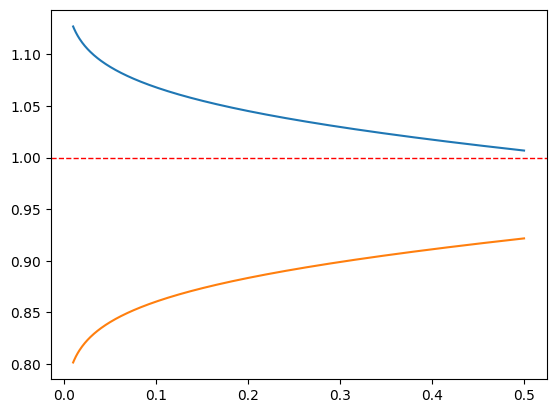

In [72]:
n = 1000
mu = 1
sigm = 2
samp = np.random.normal(mu, sigm, n)

rbound_vals = []
lbound_vals = []

from statsmodels.stats.weightstats import DescrStatsW as ds
B_vals = np.linspace(0.5, 0.99,  500)
a = 1-B_vals   # a - уровень значимости, является массивом np.array
desc = ds(samp)
for i in a:
    lbound, rbound = desc.tconfint_mean(alpha = i)

    rbound_vals.append(rbound)
    lbound_vals.append(lbound)

rbound_vals = np.array(rbound_vals)
lbound_vals = np.array(lbound_vals)

plt.plot(a, rbound_vals)
plt.plot(a, lbound_vals)
plt.axhline(y=1, linestyle = '--', c = 'r', linewidth = '1')






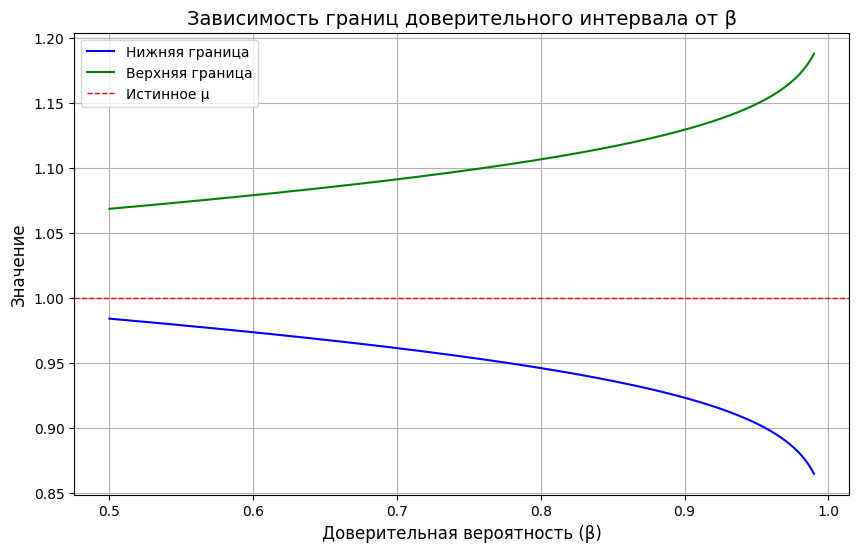

In [73]:
#GPT
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW

# Параметры генеральной совокупности
n = 1000
mu = 1  # истинное математическое ожидание
sigma = 2  # стандартное отклонение

# Генерация выборки
samp = np.random.normal(mu, sigma, n)

# Подготовка массивов для хранения результатов
B_vals = np.linspace(0.5, 0.99, 500)  # Доверительные вероятности от 50% до 99%
alpha_vals = 1 - B_vals  # Уровни значимости

rbound_vals = []
lbound_vals = []

# Создаем объект для работы с выборкой
desc = DescrStatsW(samp)

# Вычисляем доверительные интервалы для каждого уровня значимости
for alpha in alpha_vals:
    lower, upper = desc.tconfint_mean(alpha=alpha)
    lbound_vals.append(lower)
    rbound_vals.append(upper)

# Преобразуем в numpy массивы
lbound_vals = np.array(lbound_vals)
rbound_vals = np.array(rbound_vals)

# Визуализация
plt.figure(figsize=(10, 6))

# Границы доверительных интервалов
plt.plot(B_vals, lbound_vals, label='Нижняя граница', color='blue')
plt.plot(B_vals, rbound_vals, label='Верхняя граница', color='green')

# Истинное значение математического ожидания
plt.axhline(y=mu, linestyle='--', color='red', linewidth=1, label='Истинное μ')

# Настройки графика
plt.xlabel('Доверительная вероятность (β)', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title('Зависимость границ доверительного интервала от β', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Cамостоятельная работа

# Задание 1
<!-- Задание 1. Экспериментально сопоставьте методы получения ин-
тервальных оценок: бутстреп и параметрический (традиционный). Сге-
нерируйте 1000 выборок из генеральной совокупности, имеющей нор-
мальное распределение с конкретными параметрами 𝑚, 𝜎 (значение па-
#раметров 𝑚, 𝜎 и объем выборки выберите самостоятельно).
1) Для каждой выборки получите интервальные оценки для мате-
матического ожидания и дисперсии методом бутстреп (доверительную
вероятность примите равной 0,95). Какая часть полученных интервалов
накрыла соответствующие параметры?
2) Для тех же выборок получите интервальные оценки для матема-
тического ожидания и дисперсии традиционным методом (доверитель-
ную вероятность примите равной 0,95). Какая часть полученных интер-
валов накрыла соответствующие параметры?
Сопоставьте результаты пунктов 1 и 2 и прокомментируйте их. -->

In [74]:
# import numpy as np
# from scipy.stats import bootstrap

# # Данные (например, доходы людей)
# incomes = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 200])

# # Бутстреп для среднего дохода
# result = bootstrap(
#     data=(incomes,),  # Передаём как кортеж
#     statistic=np.mean,  # Исследуемая статистика
#     n_resamples=5000,   # Количество бутстреп-выборок
#     confidence_level=0.95,
#     method='percentile'  # Метод процентилей
# )

# print(f"95% ДИ для среднего: {result.confidence_interval}")




In [75]:
from scipy.stats import bootstrap
n = 50
mu = 5
sigm = 3
B = 0.95
sample = np.random.normal(loc = mu, scale =  sigm, size = n)

#boostrap для матожидания 
result = bootstrap(
    data = (sample,),       # Передаём как кортеж
    statistic=np.mean,      # Исследуемая статистика
    n_resamples=1000,       # Количество бутстреп-выборок
    confidence_level=B,     # Уровень доверия
    method='percentile'     # Метод процентилей
)
boost_low_mean, boost_up_mean = result.confidence_interval
print(f"Boostrap: 95% ДИ для среднего: {boost_low_mean:.4f} <  mu  < {boost_up_mean:.4f}, length: {(boost_up_mean - boost_low_mean):.4f}")

#boostrap для дисперсии 
result = bootstrap(
    data = (sample,),
    statistic=np.var,
    n_resamples=1000,
    confidence_level=B,
    method='percentile'
)
boost_low_var, boost_up_var = result.confidence_interval
print(f"Boostrap: 95% ДИ для var: {boost_low_var:.4f} <  D  < {boost_up_var:.4f}, length: {(boost_up_var - boost_low_var):.4f}")

#параметрический метод: матожидание
import scipy.stats as sts
S = np.std(sample, ddof = 1)
mu_hat = np.mean(sample)
param_low_mean, param_up_mean= sts.t.interval(confidence=B, df = n-1, loc = mu_hat, scale = S/np.sqrt(n))
print(f"Param: 95% ДИ для mean: {param_low_mean:.4f} <  mu < {param_up_mean:.4f}, length: {(param_up_mean - param_low_mean):.4f}")

#параметрический метод: дисперсия 
alpha = 1-B
chi2_low = sts.chi2.ppf(1-alpha/2, df = n-1)
chi2_up = sts.chi2.ppf(alpha/2, df = n-1)

param_low_var = (n-1)*S**2 / chi2_low
param_up_var = (n-1)*S**2 / chi2_up
print(f"Param: 95% ДИ для var: {param_low_var:.4f} <  D  < {param_up_var:.4f}; length: {(param_up_var - param_low_var):.4f}")




Boostrap: 95% ДИ для среднего: 4.1902 <  mu  < 6.0377, length: 1.8476
Boostrap: 95% ДИ для var: 7.8142 <  D  < 17.4555, length: 9.6412
Param: 95% ДИ для mean: 4.0889 <  mu < 6.1243, length: 2.0353
Param: 95% ДИ для var: 8.9474 <  D  < 19.9116; length: 10.9642


In [76]:
# GPT - решение нужного задания
import numpy as np
import scipy.stats as st
from scipy.stats import bootstrap

# Параметры генеральной совокупности
m = 5      # Истинное среднее
sigma = 3  # Истинное СКО
n = 30     # Объем выборки
B = 1000   # Количество выборок
confidence = 0.95  # Уровень доверия

# Хранилище результатов
coverage_boot_mean = 0  # Счетчик покрытий для bootstrap (среднее)
coverage_param_mean = 0 # Счетчик покрытий для параметрического (среднее)
coverage_boot_var = 0   # Счетчик покрытий для bootstrap (дисперсия)
coverage_param_var = 0  # Счетчик покрытий для параметрического (дисперсия)

for _ in range(B):
    # Генерация выборки
    sample = np.random.normal(loc=m, scale=sigma, size=n)
    
    # === 1) Bootstrap для среднего ===
    result = bootstrap(
        data=(sample,), 
        statistic=np.mean, 
        n_resamples=1000,
        confidence_level=confidence,
        method='percentile'
    )
    low, up = result.confidence_interval
    if low <= m <= up:
        coverage_boot_mean += 1
    
    # === 2) Параметрический метод для среднего (t-распределение) ===
    se = np.std(sample, ddof=1) / np.sqrt(n)  # Стандартная ошибка
    low, up = st.t.interval(confidence, df=n-1, loc=np.mean(sample), scale=se)
    if low <= m <= up:
        coverage_param_mean += 1
    
    # === 3) Bootstrap для дисперсии ===
    result = bootstrap(
        data=(sample,), 
        statistic=np.var, 
        n_resamples=1000,
        confidence_level=confidence,
        method='percentile'
    )
    low, up = result.confidence_interval
    if low <= sigma**2 <= up:
        coverage_boot_var += 1
    
    # === 4) Параметрический метод для дисперсии (χ²-распределение) ===
    s2 = np.var(sample, ddof=1)  # Исправленная дисперсия
    alpha = 1 - confidence
    chi2_low = st.chi2.ppf(1 - alpha/2, df=n-1)
    chi2_up = st.chi2.ppf(alpha/2, df=n-1)
    low = (n - 1) * s2 / chi2_low
    up = (n - 1) * s2 / chi2_up
    if low <= sigma**2 <= up:
        coverage_param_var += 1

# Результаты
print(f"Bootstrap (среднее): {coverage_boot_mean / B * 100:.2f}% интервалов накрыли m")
print(f"Параметрический (среднее): {coverage_param_mean / B * 100:.2f}% интервалов накрыли m")
print(f"Bootstrap (дисперсия): {coverage_boot_var / B * 100:.2f}% интервалов накрыли σ²")
print(f"Параметрический (дисперсия): {coverage_param_var / B * 100:.2f}% интервалов накрыли σ²")

Bootstrap (среднее): 92.70% интервалов накрыли m
Параметрический (среднее): 94.40% интервалов накрыли m
Bootstrap (дисперсия): 87.20% интервалов накрыли σ²
Параметрический (дисперсия): 95.70% интервалов накрыли σ²


# Задание 2
<!-- Исследуйте вопрос о минимальном объеме выборки,
необходимом для достижения заданной точности оценки при проведе-
нии экспериментов по схеме Бернулли. При выполнении задания исхо-
дите из предположения ~ ( , ) X B n p, 1
npq  и используйте прибли-
женный доверительный интервал

1) Сгенерируйте выборки различных объемов n из генеральной
совокупности, имеющей индикаторное распределение с параметром p
(значение параметра p возьмите равным отношению длины вашего
имени к сумме длин имени и фамилии). Для каждой выборки найдите
доверительный интервал для вероятности события p (доверительную
вероятность принять равной 0,95). Результаты визуализируйте, постро-
ив график экспериментальной зависимости верхней и нижней границ
доверительных интервалов от объема выборки. Экспериментально оце-
ните минимальный объем выборки, позволяющий при заданной довери-
тельной вероятности утверждать, что доля «успехов» в выборке отлича-
ется от значения параметра p не более чем на 2 %.
2) Теоретически оцените минимальный объем выборки, позволя-
ющий при заданной доверительной вероятности утверждать, что доля
«успехов» в выборке отличается от значения параметра p не более чем
на 2 % (2, стр. 244-245)
3) Используя функцию samplesize_confint_proportion, оцените ми-
нимальный объем выборки, позволяющий при заданной доверительной
вероятности утверждать, что доля «успехов» в выборке отличается от
значения параметра p не более чем на 2 %.
Сравните результаты, полученные при выполнении п. 1, п. 2 и п. 3. -->

2339.448421802722
2339.4484218027237


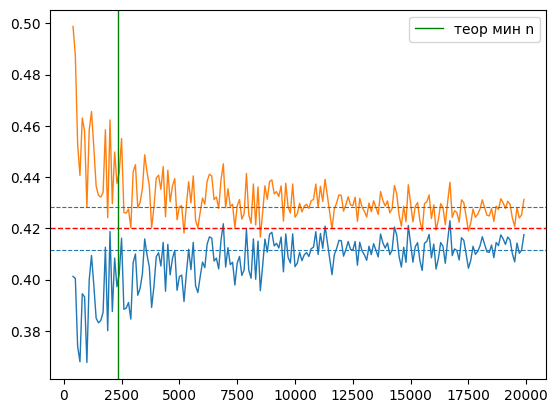

In [119]:
#1)
p = 0.42
B = 0.95
n_val = np.arange(400, 20000, 100)
low_bound_vals = []
up_bound_vals = []
for n in n_val:
    trials = sts.bernoulli(p=0.42).rvs(size=n)
    P = sum(trials)/n
    u = sts.norm.ppf((1+B)/2)
    sq = u*np.sqrt(P*(1-P)/n)
    low_bound = P - sq
    up_bound = P + sq
    low_bound_vals.append(low_bound)
    up_bound_vals.append(up_bound)

low_bound_vals = np.array(low_bound_vals)
up_bound_vals = np.array(up_bound_vals)

plt.plot(n_val, low_bound_vals, linewidth = 1)
plt.plot(n_val, up_bound_vals, linewidth = 1)
#length =up_bound_vals- low_bound_vals
#plt.plot(n_val, length)
plt.axhline(y=0.42, linestyle = '--', c = 'r', linewidth = 1)
nid =  0.42-0.42*0.02
nid2 =  0.42+0.42*0.02
plt.axhline(y = nid, linestyle = '--', linewidth = 0.8)
plt.axhline(y = nid2, linestyle = '--', linewidth = 0.8, )


#2) теоретическое значение n 
u = sts.norm.ppf((1+B)/2)
n_min = (p - p**2)*(u/0.02)**2
print(n_min)
plt.axvline(x = n_min, c = 'g', linewidth = 1, label = 'теор мин n')

plt.legend()

#3) используем встроенноую функцию 
from statsmodels.stats.proportion import samplesize_confint_proportion

n_min_con= samplesize_confint_proportion(0.42, 0.02, alpha=0.05)
print(n_min_con)  

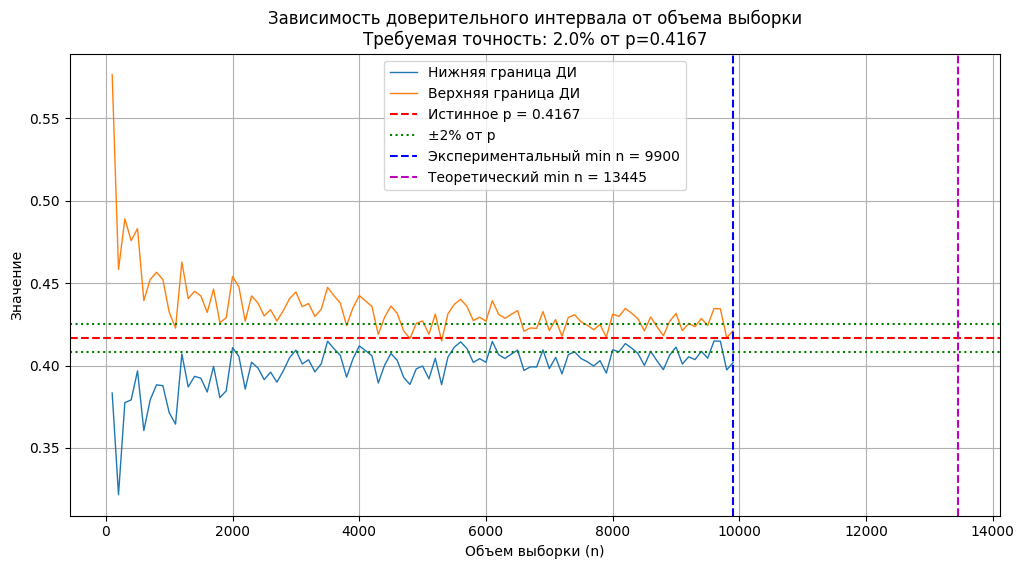

Теоретически рассчитанный минимальный объем выборки: 13445
Экспериментально найденный минимальный объем выборки: 9900


In [100]:
#GPT
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# Параметры задачи
name_len = 5    # Пример длины имени
surname_len = 7  # Пример длины фамилии
p = name_len / (name_len + surname_len)  # 0.4167
B = 0.95        # Доверительная вероятность
relative_margin = 0.02  # Относительная точность 2% от p
absolute_margin = p * relative_margin  # Абсолютная точность (2% от p)

# Диапазон объемов выборки
n_val = np.arange(100, 10000, 100)

# Для хранения результатов
low_bound_vals = []
up_bound_vals = []
widths = []
reached_accuracy = []

# Квантиль нормального распределения
u = sts.norm.ppf((1 + B)/2)

for n in n_val:
    # Генерация выборки
    trials = sts.bernoulli(p=p).rvs(size=n)
    P = np.mean(trials)
    
    # Доверительный интервал (используем истинное p для стандартной ошибки)
    se = np.sqrt(p*(1-p)/n)  # Стандартная ошибка
    margin = u * se
    low_bound = max(P - margin, 0)
    up_bound = min(P + margin, 1)
    
    low_bound_vals.append(low_bound)
    up_bound_vals.append(up_bound)
    widths.append(up_bound - low_bound)
    
    # Проверяем, достигнута ли требуемая точность
    reached_accuracy.append(margin <= absolute_margin)

# Находим минимальный объем выборки, удовлетворяющий условию
if any(reached_accuracy):
    min_n = n_val[np.argmax(reached_accuracy)]
else:
    min_n = n_val[-1]  # Если точность не достигнута, берем максимальный n

# Теоретическая оценка минимального n (ИСПРАВЛЕННАЯ СТРОКА)
required_n = int((u**2 * p * (1-p)) / (absolute_margin**2))

# Визуализация
plt.figure(figsize=(12, 6))

# Границы доверительных интервалов
plt.plot(n_val, low_bound_vals, label='Нижняя граница ДИ', lw=1)
plt.plot(n_val, up_bound_vals, label='Верхняя граница ДИ', lw=1)

# Истинное значение и границы точности
plt.axhline(y=p, color='r', linestyle='--', label=f'Истинное p = {p:.4f}')
plt.axhline(y=p*(1-relative_margin), color='g', linestyle=':', label='±2% от p')
plt.axhline(y=p*(1+relative_margin), color='g', linestyle=':')

# Ширина доверительного интервала
#plt.plot(n_val, widths, 'k-', label='Ширина ДИ')

# Минимальный объем выборки
plt.axvline(x=min_n, color='b', linestyle='--', 
            label=f'Экспериментальный min n = {min_n}')
plt.axvline(x=required_n, color='m', linestyle='--', 
            label=f'Теоретический min n = {required_n}')

plt.xlabel('Объем выборки (n)')
plt.ylabel('Значение')
plt.title('Зависимость доверительного интервала от объема выборки\n'
          f'Требуемая точность: {relative_margin*100}% от p={p:.4f}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Теоретически рассчитанный минимальный объем выборки: {required_n}")
print(f"Экспериментально найденный минимальный объем выборки: {min_n}")
